In [1]:
#@title Import necessary packages and set correct device

import os

import numpy as np
import torch
from tqdm import tqdm

from modules.yoloclip import YoloClip
from modules.refcocog import RefCOCOg, RefCOCOgSample

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("[INFO] GPU found, using GPU.")
else:
    device = torch.device("cpu")
    print("[INFO] No GPU found, using CPU instead.")


[INFO] No GPU found, using CPU instead.


In [2]:
#@title Import RefCOCOg dataset and its train/val/test splits

os.chdir("../")

dataset = RefCOCOg(ds_path='dataset/refcocog')

train_ds = RefCOCOg(ds_path='dataset/refcocog', split='train')
val_ds = RefCOCOg(ds_path='dataset/refcocog', split='val')
test_ds = RefCOCOg(ds_path='dataset/refcocog', split='test')

print(f"Dataset Size: {len(dataset)}\n")
print(f"Train size: {len(train_ds)}")
print(f"Val size:   {len(val_ds)}")
print(f"Test size:  {len(test_ds)}")


Dataset Size: 49822

Train size: 42226
Val size:   2573
Test size:  5023


In [ ]:
#@title Initialize YoloClip pipeline

yoloclip = YoloClip(device=device, quiet=False, categories=dataset.categories)


[INFO] Running YOLO on the image...
[INFO] YOLO found 26 objects
[INFO] Running CLIP on detected objects...
[INFO] Running CLIP on the prompt...
[INFO] true: bench | predicted: chair


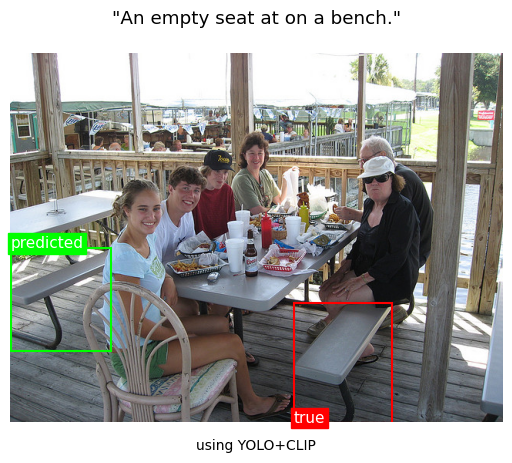

[INFO] Running YOLO on the image...
[INFO] YOLO found 26 objects
[INFO] Running CLIP on detected objects...
[INFO] Running CLIP on the prompt...
[INFO] true: bench | predicted: chair


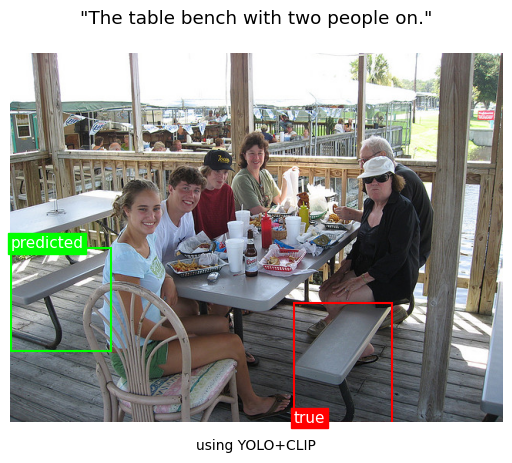

In [4]:
#@tile Test YoloClip on a random sample

%matplotlib inline

idx = np.random.randint(0, len(dataset))

sample = RefCOCOgSample(**dataset[idx])

for sentence in sample.sentences:
    yoloclip(sample, sentence, show=True)


---

In [5]:
#@title Function definition to test visual grounding with a given pipeline

def visual_grounding_test(vg_pipeline, dataset):
    scores = list()

    for sample in tqdm(dataset, desc=f"Testing on {len(dataset)} images"):

        sample = RefCOCOgSample(**sample)

        for sentence in sample.sentences:

            try:
                sc = vg_pipeline(sample, sentence, show=False)
            except ValueError:
                continue

            scores.append(sc)

    for metric in scores[0].keys():
        avg_metric = np.mean([score[metric] for score in scores])

        print("Avg. {}: {:.3f}".format(metric, avg_metric))


In [ ]:
#@title Test YoloClip on the test set

yoloclip.quiet = True

visual_grounding_test(yoloclip, test_ds)
